# 头盔识别预处理实验

## 目的是将头盔变成一个类圆形白色联通区，便于机器识别

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## 图片路径 

In [2]:
path = 'helmet2.jpg'

# 打开图片

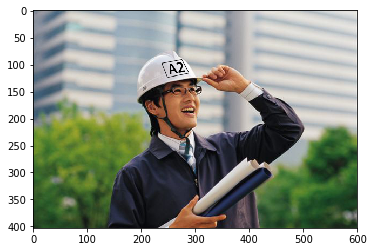

In [3]:
img = cv.imread(path)
img = img[:,:,[2,1,0]]
plt.imshow(img)

# 灰度图像
加快处理速度

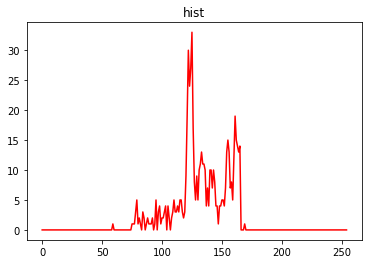

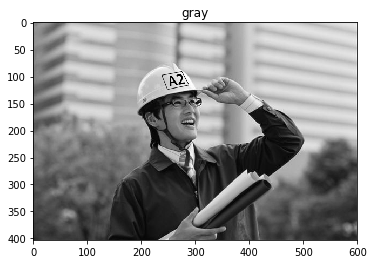

In [4]:
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY) 
#plt.imshow(gray,cmap='gray')
hist = cv.calcHist(gray,[0],None,[255],[0,255])
plt.plot(hist,'r')
plt.title('hist')
plt.show()
plt.imshow(gray,cmap='gray')
plt.title('gray')
plt.show()

# 直方图均衡化
图像的直方图是对图像对比度效果上的一种处理，旨在使得图像整体效果均匀，黑与白之间的各个像素级之间的点更均匀一点。 
通过这种方法，亮度可以更好地在直方图上分布。这样就可以用于增强局部的对比度而不影响整体的对比度，直方图均衡化通过有效地扩展常用的亮度来实现这种功能。

这种方法对于背景和前景都太亮或者太暗的图像非常有用，这种方法尤其是可以带来X光图像中更好的骨骼结构显示以及曝光过度或者曝光不足照片中更好的细节。

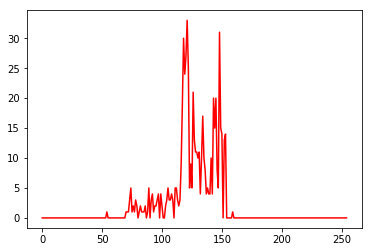

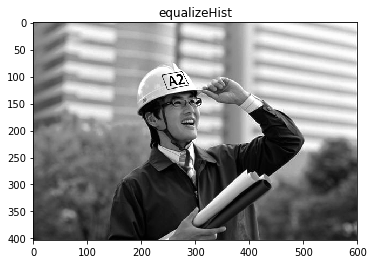

In [5]:
gray_hist = cv.equalizeHist(gray)
#plt.imshow(equ,cmap='gray')
hist = cv.calcHist(gray_hist,[0],None,[255],[0,255])
plt.plot(hist,'r')
plt.show()
plt.imshow(gray_hist,cmap='gray')
plt.title('equalizeHist')
plt.show()

# 高斯滤波
高斯滤波是一种线性平滑滤波，对于除去高斯噪声有很好的效果。

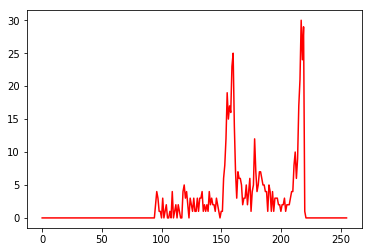

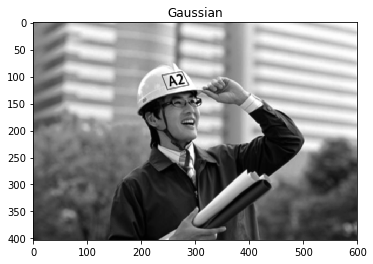

In [6]:
Gaussian=cv.GaussianBlur(gray_hist,(3,3),0,0, cv.BORDER_DEFAULT)
hist_Gaussian = cv.calcHist(Gaussian,[0],None,[256],[0,256])
plt.plot(hist_Gaussian,'r')
plt.show()
plt.imshow(Gaussian,cmap='gray')
plt.title('Gaussian')
plt.show()

# 中值滤波

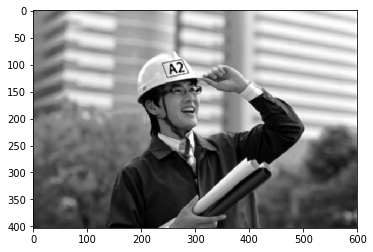

In [7]:
Median= cv.medianBlur(Gaussian,3)
plt.imshow(Median,'gray')

# Canny边缘检测
最厉害的边缘检测，效果太猛，不适用

In [8]:
def edge_image(image):
    blurred = cv.GaussianBlur(image, (5, 5), 0)
    #gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
    xgrad = cv.Sobel(gray, cv.CV_16SC1, 1, 0)
    ygrad = cv.Sobel(gray, cv.CV_16SC1, 0, 1)
    edge_output = cv.Canny(xgrad, ygrad, 50, 150)
    #cv.imshow("color边缘",edge_output)
    return edge_output

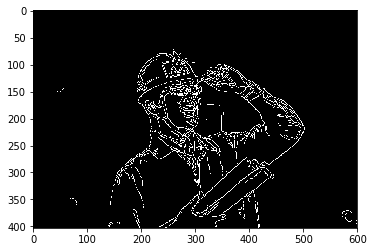

In [ ]:
Canny = edge_image(Median)
plt.imshow(Canny,'gray')

# Sobel算子边缘提取

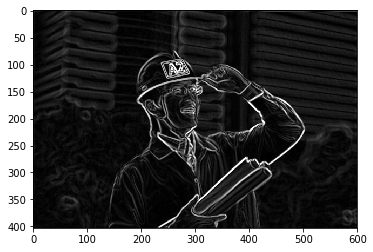

In [ ]:
x = cv.Sobel(Median,cv.CV_16S,1,0)
y = cv.Sobel(Median,cv.CV_16S,0,1)
 
absX = cv.convertScaleAbs(x)   # 转回uint8
absY = cv.convertScaleAbs(y)
 
dst = cv.addWeighted(absX,0.5,absY,0.5,0)
plt.imshow(dst,'gray')

In [ ]:
image1 = np.hstack([Canny,dst])

#显示图像，随时注释
cv.namedWindow("images",0)
cv.imshow('images', image1)
cv.waitKey(0)


# 形态学运算

In [ ]:
element1 = cv.getStructuringElement(cv.MORPH_RECT,(3,1))
element2 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))

Dilation= cv.dilate(dst, element2, iterations =1)
Erosion= cv.erode(Dilation, element1, iterations =1)
Dilation2= cv.dilate(Erosion, element2,iterations =3)

image2 = np.hstack([Canny,dst,Dilation])

# cv.namedWindow("images",0)
# cv.imshow('images', image2)
# cv.waitKey(0)